In [2]:
import numpy as np
import pytraj as pt
frames1 = np.load('frames_Q1_dry.npy')
import matplotlib.pyplot as plt
coms = np.load('frames_Q1_dry_coms.npy')
coas = np.load('frames_Q1_dry_coas.npy')
bending = np.load('frames_Q1_dry_bending_1.npy')

twist = np.load('frames_Q1_twist_1.npy')


%matplotlib inline
dihedral = np.load('dihedral_Q1_dry.npy',allow_pickle=True)
Q = "Q1_dry" 

In [4]:
traj

pytraj.Trajectory, 12500 frames: 
Size: 0.267103 (GB)
<Topology: 956 atoms, 66 residues, 33 mols, PBC with box type = truncoct>
           

In [3]:
trajpath = '/home/lionthurecht/notebooks/Q1_dry.nc'
parmpath = '/home/lionthurecht/notebooks/Q1_dry.prmtop'
#parmpath = '/home/lionthurecht/foldamer/DNAmimic-files/Q1Q2/foldaQ1h.prmtop'
traj = pt.load(trajpath, parmpath)

In [7]:
pt.write_traj(Q+".pdb", traj[::100],overwrite = True)


In [10]:
def angle(a,b):
    'Winkel zwischen Zwei Vektoren im bogenmaß'
    return np.arccos(np.dot(a,b)/(np.linalg.norm(a) * np.linalg.norm(b)))
def angle_sum(all_frames, frame_number,xyz = 0):
    'Winkel zwischen Basisvectoren, immer zwischen zwei resid, immer dem jeweils nächstem'
    res = 0
    for  i in range(31):
        res += angle(all_frames[frame_number,i,0:3,xyz],all_frames[frame_number,i+1,0:3,xyz])
    return res 
def angle_sum_allframes(all_frames, xyz ):
    res = []
    for i in range(np.shape(all_frames)[0]):
        res.append(angle_sum(all_frames,i,xyz = xyz))
    return res
                     
def angle_twist(all_frames, frame_number, xyz = 0, res_dist_end = 3):
    'Winkel zwischen den Basisvektoren zwischen dem Res_dist_end vom Anfang und ende Entfernten Resid;vgl angle_sum()'
    len = np.shape(all_frames)[1]
    return angle(all_frames[frame_number, 0 + res_dist_end,0:3,xyz],all_frames[frame_number, len - res_dist_end,0:3,xyz])

def angle_twist_allframes(all_frames, xyz ):
    res = []
    for i in range(np.shape(all_frames)[0]):
        res.append(angle_twist(all_frames,i,xyz = xyz))
    return res
        
def angle_diff(all_frames,frame_number,xyz= 0):
    'winkel zwischen Zwei reisdues'
    len = np.shape(all_frames)[1]
    res = []
    for i in range(1,31):
        res.append(angle(all_frames[frame_number,i,0:3,xyz],all_frames[frame_number,i+1,0:3,xyz]))
    
    return np.array(res)
    
def angle_diff_allframes(all_frames,xyz):
    res = []
    for i in range(np.shape(all_frames)[0]):
        res.append(angle_diff(all_frames,i,xyz = xyz))
    res = np.transpose(np.array(res))
    return res 
def average(diff):
    'mittlwert einer Größe die im Format sth[res][frame]'
    res = []
    for i in range(np.shape(diff)[0]):
        res.append(np.average(diff[i]))
    return res
def varianz(diff, average = 0):
    'varianz einer größe die im format sth[res][frames]'
    res = []
    for j in range(len(average)):
        res2 = 0    
        for i in range(np.shape(diff)[0]):
            res2 = res2 + ((average[j] - diff[j,i])**2) / np.shape(diff)[0]
     
        res.append(res2)
    #res = []
    #for i in range(np.shape(diff)[0]):
    #    res.append(np.var(diff[i]))
    return res
                   
def average_angle_twist(all_frames,frame_number, size = 1,n = 2, xyz = 0):
    '''besseres averrage_twist, irgenwie das selbe wie angle_twist, mittelt aber über 4(n) resid
    summiert erst auf der einen Seite 4 vektoren auf und auf der anderen Seite auf, dann davon der winkel '''
    
    
    vec_base = all_frames[frame_number,n,xyz]
        
    for m in range(size-1):
        vec_base = vec_base + all_frames[frame_number,n+m+1,xyz]
            
    vec_out = all_frames[frame_number,np.shape(all_frames)[1] -n,xyz]
    for m in range(size-1):
        vec_out = vec_out + all_frames[frame_number,np.shape(all_frames)[1]-n-m-1,xyz]
    return angle(vec_base,vec_out)
    #return vec_out
def average_angle_twist_all_frames(all_frames,size = 4, n = 2, xyz = 0):
    res = []
    #reshapeing the input
    all_frames = all_frames.reshape(12500,32,3,3)
    
    for i in range(np.shape(all_frames)[0]):
        res.append(average_angle_twist(all_frames,i,size=size,n=n,xyz=xyz))
    return res
def vector_com(all_coms,frame_number):
    res = []
    for i in range(np.shape(all_coms)[1]-1):
        res.append(all_coms[frame_number][i][:][:] - all_coms[frame_number][i+1][:][:])
    return res
def len_vector_com(all_coms,frame_number):
    res = 0
    
    coms = vector_com(all_coms, frame_number)
    for i in range(len(coms)-1):
        res = res + np.linalg.norm(coms[i][0]) * np.sin(angle(coms[i][0],coms[i+1][0])/ 2)
    return res
        
def len_vector_com_all(all_coms):
    res = []
    for i in range(len(coms)):
        res.append(len_vector_com(all_coms,i))
    return res
def dist_com_com(all_coms,n1,n2):
    dist = []
    for i in range(len(coms)):
        dist.append(np.linalg.norm(coms[i,n1] - coms[i,n2]))
    return dist
    

In [ ]:
1

In [21]:
coms = coms.reshape(12500,32,3)
def test(frame):
    dist1 = coms[0,frame] - coms[18,frame]
    dist2 = coms[18,frame] - coms[31,frame]
    return angle(dist1,dist2)
    coms[389,2]


In [20]:
def dist(res1,atom1,res2,atom2,traj=traj):
    return pt.distance(traj, ":"+str(res1)+"&@"+str(atom1)+" :"+str(res2)+"&@"+str(atom2))


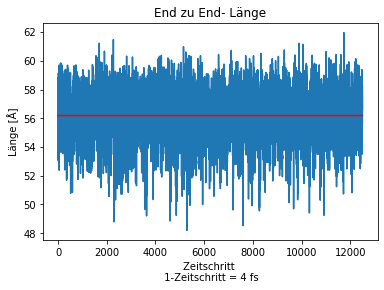

56.18991545541637 2.7558191145787756


In [23]:
#contur_vec = pt.vector.vector(traj,":1&@C :34&@N" )
fig8 = plt.figure()
#plt.axis([8000,8300,0,3])
#plt.axis([2200,2240,0,10])
plt.title("End zu End- Länge")
plt.xlabel("Zeitschritt \n 1-Zeitschritt = 4 fs")
plt.ylabel("Länge [Å]")

contur = pt.distance(traj, ":1&@C :34&@N")

plt.plot(contur)
plt.plot([np.average(contur)] * 12500, c = "r")
plt.show()
print(np.average(contur), np.var(contur))

#fig8.show()

75.23961722390672

array([ 52.77073461, -45.74404881, -53.35857535])

(12500,)

In [424]:
np.shape(frames1.reshape(12500,32,3,3))

np.array([1,2,3]) + np.array([1,2,3]) 

array([2, 4, 6])

In [10]:
rms = pt.rmsd(traj, ':1-34&!@H=', 0)
rmsf1 = pt.rmsf(traj, ':1-34&!@H=', options="byres")


In [29]:
x_diff = angle_diff_allframes(frames1,0)
y_diff = angle_diff_allframes(frames1,1)
z_diff = angle_diff_allframes(frames1,2)
x_diff_average = average(x_diff)
y_diff_average = average(y_diff)
z_diff_average = average(z_diff)
x_diff_varianz = varianz(x_diff, average = x_diff_average)
y_diff_varianz = varianz(y_diff, average = y_diff_average)
z_diff_varianz = varianz(z_diff, average = z_diff_average)


In [12]:
angle([0,1,1],[1,1,0])

1.0471975511965979

In [30]:
x_twist = angle_twist_allframes(frames1,0)
y_twist = angle_twist_allframes(frames1,1)
z_twist = angle_twist_allframes(frames1,2)

In [9]:
x_sum = angle_sum_allframes(frames1,0)
y_sum = angle_sum_allframes(frames1, xyz = 1)
z_sum = angle_sum_allframes(frames1, xyz = 2)

NameError: name 'angle_sum_allframes' is not defined

<IPython.core.display.Javascript object>


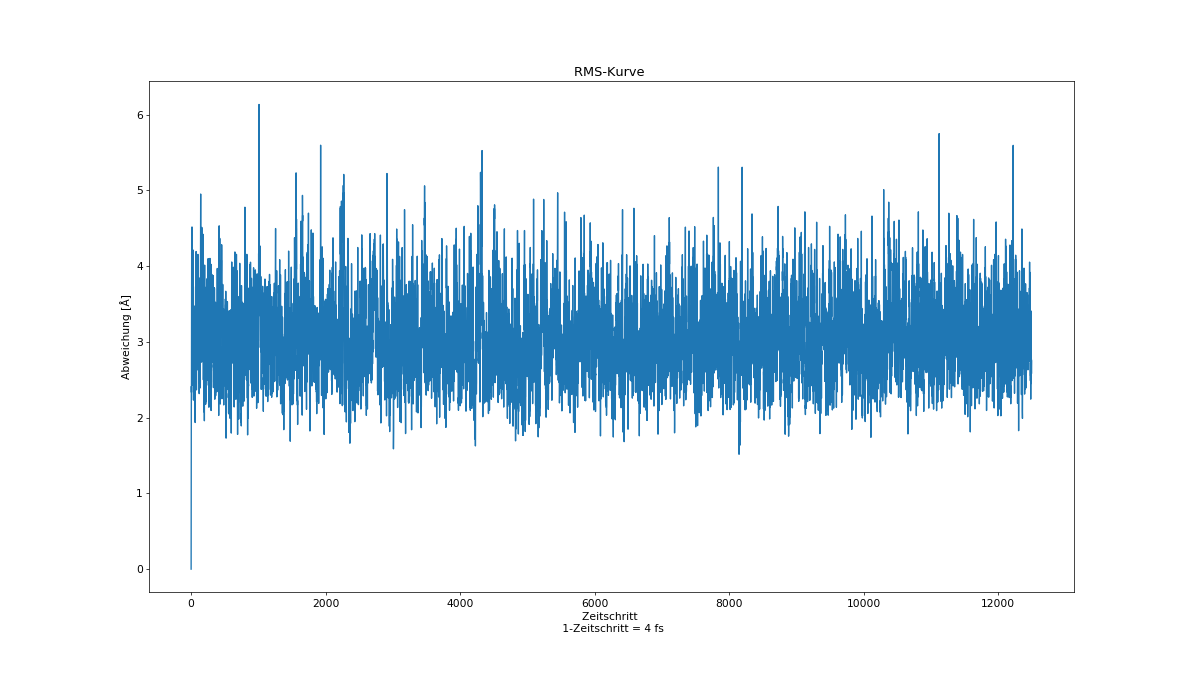

3.0595067499129214
RMS-Kurve des  Q1_salt Moleküls:


In [52]:
fig10 = plt.figure()
#plt.axis([8000,8300,0,3])
#plt.axis([2200,2240,0,10])
plt.title("RMS-Kurve ")
plt.xlabel("Zeitschritt \n 1-Zeitschritt = 4 fs")
plt.ylabel("Abweichung [Å]")
fig10.set_size_inches(18.5,10.5)

print(np.mean(rms))

plt.plot(rms)

plt.show()
print('RMS-Kurve des ',Q,'Moleküls:')
#plt.savefig("rms"+Q)

RMSF-Kurve des  Q1_salt Moleküls:


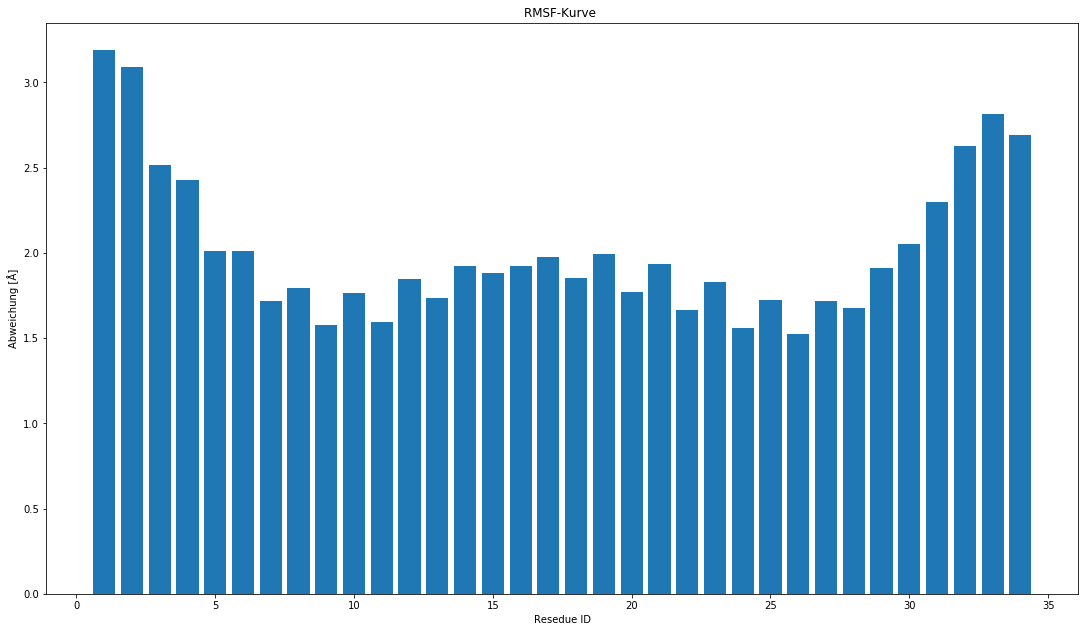

In [13]:
fig = plt.gcf()
plt.title("RMSF-Kurve ")
plt.xlabel("Resedue ID")
plt.ylabel("Abweichung [Å]")
fig.set_size_inches(18.5,10.5)
plt.bar(rmsf1[:, 0], rmsf1[:, 1])
plt.savefig("rmsf"+Q)
print('RMSF-Kurve des ',Q,'Moleküls:')

<IPython.core.display.Javascript object>


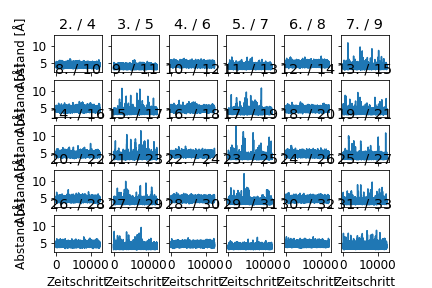

<IPython.core.display.Javascript object>


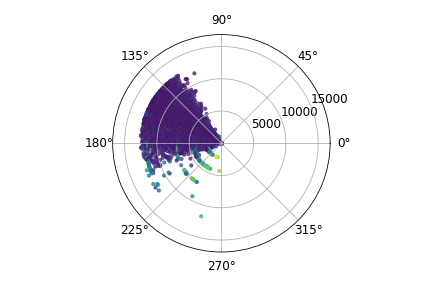

<IPython.core.display.Javascript object>


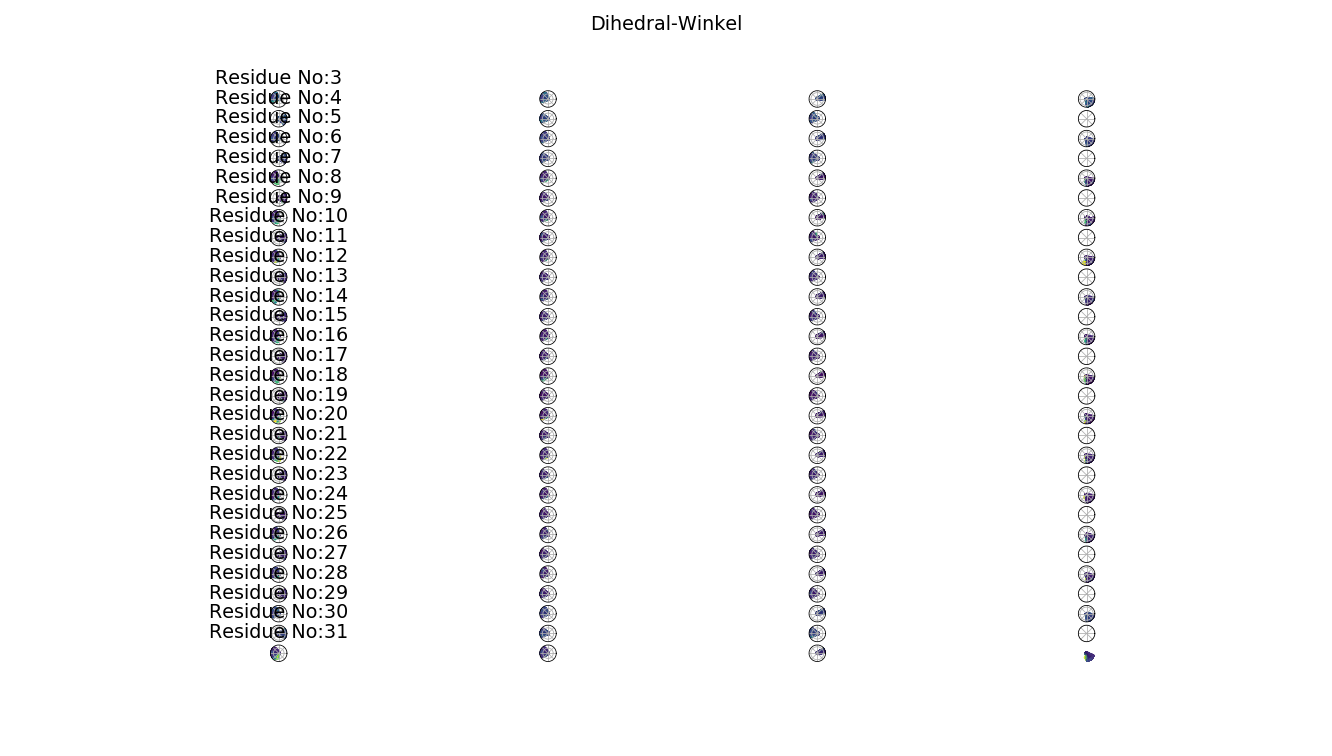

<IPython.core.display.Javascript object>


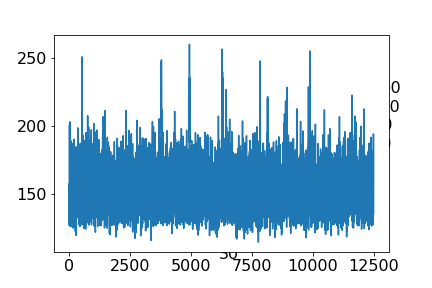

<IPython.core.display.Javascript object>


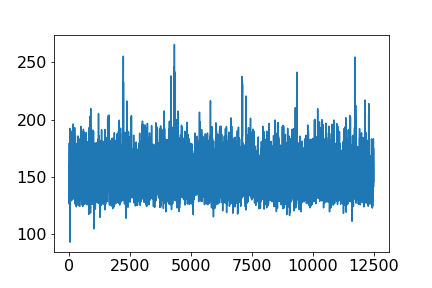

<IPython.core.display.Javascript object>


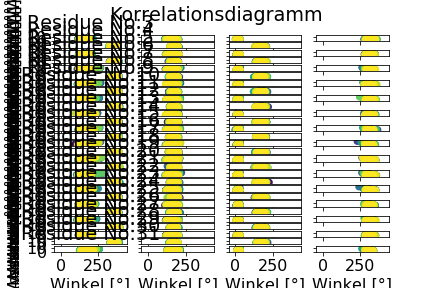

<IPython.core.display.Javascript object>


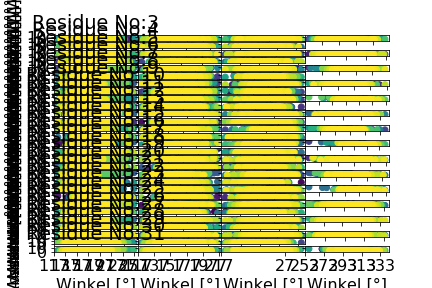

In [40]:
%matplotlib notebook
# unter umständen zuerst %math.. asuführen und dann nochmal mit 3d... 
resid = 17
dihed = dihedral[resid - 2][0]
distance = dist(resid,"C9",resid +2,"C9")
# index in python ist der index plus 2 (vlt auch plus 4) in pytraj
#interessante dihedral winkel: [17:0], [5,0], [7,0], [7,1], [9,0],[11,0] [17,0] [Ug:0];[14,1],[19,1], [15,3],[17,3],[19,3]
# 13 is a good example at frame 2222
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker
#fig = plt.gcf()
#plt.axis([1500,1700,0,360])
#plt.plot(dihed)

plt.rcParams.update({'font.size': 12})
#plt.show()

fig_dist,axs = plt.subplots(5,6,  sharex=True, sharey=True)
i = 0
j = 0
temp = []
while i <= 29:
    #fig_dist.suptitle( str(i+2) + '/'+ str(i+4) ) 
    #plt.xlabel('Entfernung ' + str(i+2) + '. / '+ str(i+4) + '. Monomer. [Å]')
    axs[j,i % 6].plot(list(range(12500)),dist(i+2,"C9",i+4,"C9"))
    axs[j, i%6].set_title(str(i+2) + '. / '+ str(i+4))
    i +=1
    if i % 6 == 0 and i > 0:
        j += 1
#plt.plot(list(range(12500)),distance)

for ax in axs.flat:
    ax.set(xlabel='Zeitschritt', ylabel='Abstand [Å]')

for ax in axs.flat:
    ax.label_outer()
    
plt.show()




#print(dihedral[13][2].index(min(dihedral[13][2])))
#np.shape(np.array(dihedral[1]).reshape(12500,4)[:,1])
tetha = 2 * np.pi * dihed / 360 


fig = plt.figure()


#fig.set_size_inches(18.5,10.5)
plt.rcParams.update({'font.size': 12})
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(tetha, list(range(len(tetha))), c = dist(resid,"C9",resid +2,"C9") ,alpha=0.75,s = 10)
plt.show()

fig_angle, axs2 = plt.subplots(29, 4, subplot_kw=dict(projection='polar'))

fig_angle.set_size_inches(18.5,10.5)


plt.rcParams.update({'font.size': 16})
pos_y2 = 0
resid2 = 3
distance = dist(resid2,"C9",resid2 +2,"C9")
while resid2 <= 31:#31
    plt.axis('off')
    if resid2 % 2 == 1:
        distance = dist(resid2,"C9",resid2 +2,"C9")
    fig_angle.suptitle('Dihedral-Winkel')
    #print(resid2,pos_y2)
#colours = np.sqrt(0.09 * dihed**2 + distance**2)  
    plt.axis('off')
    axs2[pos_y2, 0].set_yticklabels([])
    axs2[pos_y2, 0].set_xticklabels([])
    axs2[pos_y2,0].scatter( 0.01745 * dihedral[resid2 - 2][0],list(range(12500)), c =  distance, s = 8)
    axs2[pos_y2, 0].set_title('Residue No:' +str(resid2))
#c2x = fig3.add_subplot(222)
    axs2[pos_y2, 1].set_yticklabels([])
    axs2[pos_y2, 1].set_xticklabels([])
    axs2[pos_y2, 1].scatter( 0.01745 * dihedral[resid2 - 2][1],list(range(12500)), c = distance, s = 8)
    
#colours = np.sqrt(0.09 * dihed**2 + distance**2)  
    axs2[pos_y2, 2].set_yticklabels([])
    axs2[pos_y2, 2].set_xticklabels([])
    axs2[pos_y2,2 ].scatter( 0.01745 * dihedral[resid2 - 2][2],list(range(12500)), c = distance, s = 8)
    plt.axis('off')
#c2x = fig3.add_subplot(222)
    try:
        axs2[pos_y2, 3].set_yticklabels([])
        axs2[pos_y2, 3].set_xticklabels([])
        axs2[pos_y2, 3].scatter(0.01745 * dihedral[resid2 - 2][3],range(12500), c = distance, s = 8) 
    except Exception:
        pass
        #axs2[pos_y,3].set_axis_off()
    
    resid2 += 1
    pos_y2 += 1

    

        
plt.show()



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #this 
#bx = fig.add_subplot(111, projection='3d')

#plt.subplot(321)
ax.scatter(transform(dihedral[resid - 2][2]),distance,list(range(len(dihed))),marker = 'x',s = 10,  c= list(range(len(dihed))))
# and this 
#ax.subplot(322)
#bx.scatter(rearange(dihedral[15][0]),rearange(dihedral[15][2]),list(range(len(dihed))),marker = 'x',s = 10,  c= list(range(len(dihed))))

#plt.subplot(323)
#plt.scatter(rearange(dihedral[15][0]),rearange(dihedral[13][0]), c= list(range(len(dihed))))
plt.show()

fig2 = plt.figure()
plt.plot(list(range(len(dihed))),transform(dihed))
plt.show()


resid = 2

fig3, axs = plt.subplots(29, 4,  sharex=True,  sharey=True)


pos_y = 0
resid = 3
while resid <= 31:
    distance = dist(resid,"C9",resid +2,"C9")
    
    
    fig3.suptitle('Korrelationsdiagramm')

#colours = np.sqrt(0.09 * dihed**2 + distance**2)  
    axs[pos_y,0].scatter(transform(dihedral[resid - 2][0], ref = 90),distance, c =  list(range(len(dihed))))
    axs[pos_y, 0].set_title('Residue No:' +str(resid))
    axs[pos_y, 0].set_ylim(0,16)
#c2x = fig3.add_subplot(222)
    if resid in [3, 15]:
        ref = 10
    else:
        ref = 0
    axs[pos_y, 1].scatter(transform(dihedral[resid - 2][1]),distance, c = list(range(len(dihed))))
    
#colours = np.sqrt(0.09 * dihed**2 + distance**2)  
    axs[pos_y,2 ].scatter(transform(dihedral[resid - 2][2], ref =  -ref),distance, c = list(range(len(dihed))))
    
#c2x = fig3.add_subplot(222)
    try:
        axs[pos_y ,3 ].scatter(transform(dihedral[resid - 2][3], ref = ref),distance, c = list(range(len(dihed)))) 
    except IndexError:
        axs[pos_y,3].set_axis_off()
        
    resid += 1
    pos_y += 1
    #print(pos_y)
    

for ax in axs.flat:
    ax.set(xlabel='Winkel [°]', ylabel='Abstand [Å]')

for ax in fig3.get_axes():
    ax.label_outer()
    
    
plt.show()



fig4, axs = plt.subplots(29, 4, sharex = False, sharey = True,  gridspec_kw={'wspace': 0})
pos_y = 0
resid = 3
distance = dist(resid,"C9",resid +2,"C9")
while resid <= 31:
    if resid %2 == 1:
        distance = dist(resid,"C9",resid +2,"C9")
    
    
    fig3.suptitle('Korrelationsdiagramm')
    
#colours = np.sqrt(0.09 * dihed**2 + distance**2)  
    axs[pos_y,0].scatter(transform(dihedral[resid - 2][0], ref = 90),distance, c =  list(range(len(dihed))))
    axs[pos_y, 0].set_title('Residue No:' +str(resid))
    axs[pos_y, 0].set_ylim(0,16)
    #axs[pos_y, 0].set_xlim(0,360)
    start, end = axs[pos_y, 0].get_xlim()
    axs[pos_y, 0].xaxis.set_ticks(np.arange(start, end, 20))
    axs[pos_y, 0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    #axs[pos_y, 0].set_aspect(1.0/axs[pos_y, 0].get_data_ratio(), adjustable='box')
#c2x = fig3.add_subplot(222)
    if resid in [3, 15]:
        ref = 10
    else:
        ref = 0
    axs[pos_y, 1].scatter(transform(dihedral[resid - 2][1], ref = ref),distance, c = list(range(len(dihed))))
    
    start, end = axs[pos_y, 1].get_xlim()
    axs[pos_y, 1].xaxis.set_ticks(np.arange(start, end, 20))
    axs[pos_y, 1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    #axs[pos_y, 1].set_aspect(1.0/axs[pos_y, 1].get_data_ratio(), adjustable='box')
#colours = np.sqrt(0.09 * dihed**2 + distance**2)  
    axs[pos_y,2 ].scatter(transform(dihedral[resid - 2][2], ref = -ref),distance, c = list(range(len(dihed))))
    
    start, end = axs[pos_y, 2].get_xlim()
    axs[pos_y, 2].xaxis.set_ticks(np.arange(start, end, 20))
    axs[pos_y, 2].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    #axs[pos_y, 2].set_aspect(1.0/axs[pos_y, 2].get_data_ratio(), adjustable='box')
#c2x = fig3.add_subplot(222)
    #axs[pos_y ,3 ].scatter(transform(dihedral[resid - 2][3]),distance, c = list(range(len(dihed)))) 
    try:
        axs[pos_y ,3 ].scatter(transform(dihedral[resid - 2][3], ref = ref),distance, c = list(range(len(dihed)))) 
        start, end = axs[pos_y, 3].get_xlim()
        axs[pos_y, 3].xaxis.set_ticks(np.arange(start, end, 20))
        axs[pos_y, 3].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
        #axs[pos_y, 3].set_aspect(1.0/axs[pos_y, 3].get_data_ratio(), adjustable='box')
    except IndexError:
        axs[pos_y,3].set_axis_off()
        
    resid += 1
    pos_y += 1
    #print(pos_y)
    
    
for ax in axs.flat:
    ax.set(xlabel='Winkel [°]', ylabel='Abstand [Å]')

for ax in fig4.get_axes():
    ax.label_outer()
    
    
plt.show()


#Frames to show lange 4300+ 2222+ 7101+;kurz 3901 2367 7266

<IPython.core.display.Javascript object>


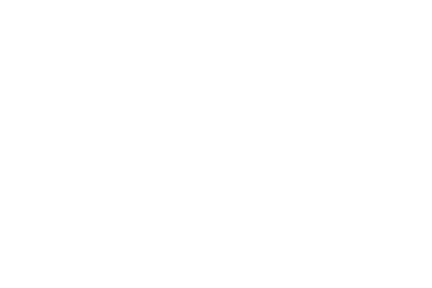

/home/lionthurecht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [44]:
%matplotlib notebook

resid =  15
dihed = dihedral[resid - 2][0]
fig413 = plt.figure()
ax413 = fig.add_subplot(111)
ax413.plot(transform(dihed))#, c = dist(resid,"C9",resid +2,"C9") ,alpha=0.75)
plt.show()

<IPython.core.display.Javascript object>


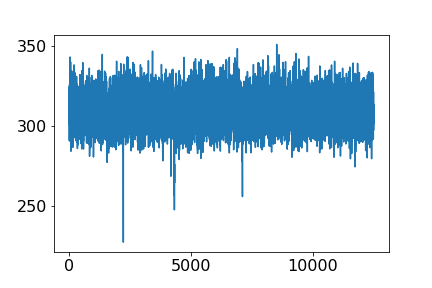

<IPython.core.display.Javascript object>


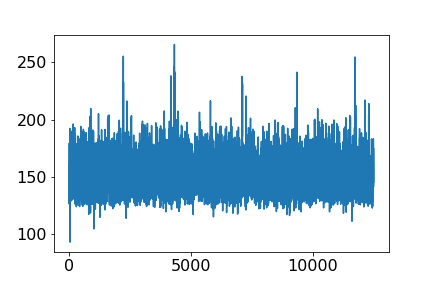

<IPython.core.display.Javascript object>


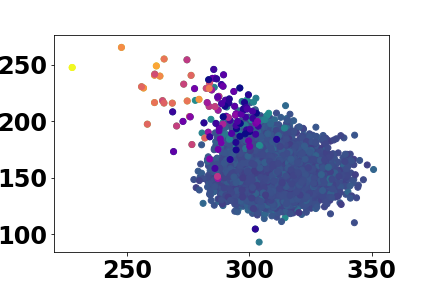

12.935538457623771


<IPython.core.display.Javascript object>


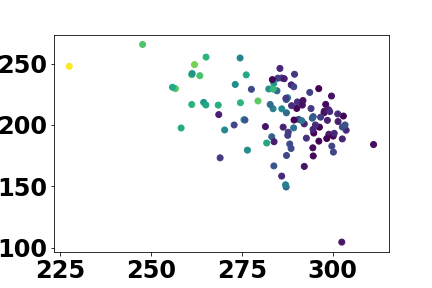

In [45]:
res = 17
import matplotlib as mpl
fig231 = plt.figure()
plt.plot(transform(dihedral[res -2][3]))
plt.show()
fig423 = plt.figure()
plt.plot(transform(dihedral[res-2][0]))
plt.show()

distance =  dist(res,"C9",res +2,"C9")
fig123 = plt.figure()

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}

mpl.rc('font', **font)

plt.scatter(transform(dihedral[res - 2][3]), (transform(dihedral[res-2][0])), c = distance,norm = mpl.colors.Normalize(vmin=1, vmax=13))# ,cmap = 'Reds')

di_ind =  np.where(distance > 7)
print(max(distance))


plt.scatter(transform(dihedral[res - 2][3][di_ind]),(transform(dihedral[res-2][0][di_ind])),cmap=  mpl.cm.plasma, c = distance[di_ind] )#, marker = 'x')
#plt.scatter(transform(dihedral[res - 2][3][di_ind]),(transform(dihedral[res-2][0][di_ind])),c = distance[di_ind] , norm = mpl.colors.Normalize(vmin=1, vmax=10),cmap = 'seismic')

plt.show()

fig783 = plt.figure()
plt.scatter(transform(dihedral[res - 2][3][di_ind]),(transform(dihedral[res-2][0][di_ind])), c = distance[di_ind])
plt.show()

In [17]:
def rearange(liste,ref= 0): # rechnet ein np.array von (-180,180) nach (0 360) um
    return np.where(liste >= ref , liste, abs(180 + liste) + 180)
    #return liste

In [18]:
def transform(x,ref=0):
    return np.where(x > ref, x, 180 + (180 + x))
    

<IPython.core.display.Javascript object>


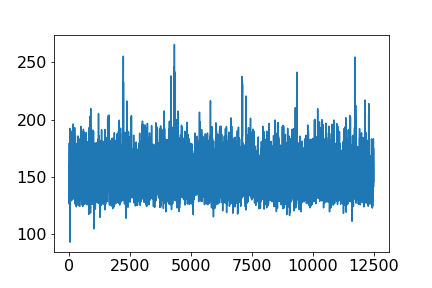

In [30]:
fig2 = plt.figure()
plt.plot(list(range(len(dihed))),transform(dihed))
plt.show()

<IPython.core.display.Javascript object>


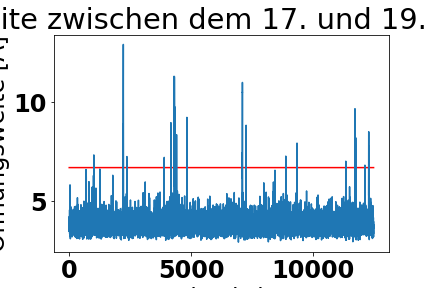

In [47]:
m = 1
n = 1
np.shape(dihedral)
test = plt.figure()
plt.title("Öffnungsweite zwischen dem 17. und 19. Monomeres ")
plt.xlabel("Zeitschritt")
plt.ylabel("Öffnungsweite [Å]")
plt.plot([6.7]* 12500, c = 'r') #fügt den roten Strich 
plt.plot(dist(17,"C9",19,"C9"))
plt.show()


<IPython.core.display.Javascript object>


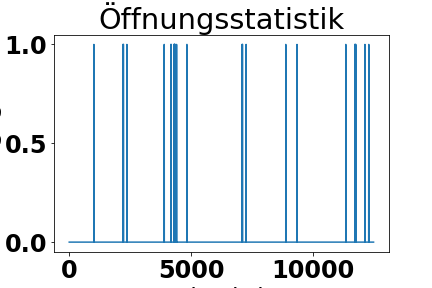

121


<IPython.core.display.Javascript object>


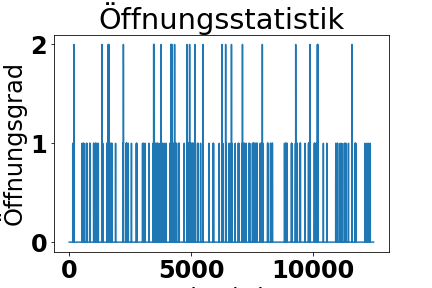

<IPython.core.display.Javascript object>


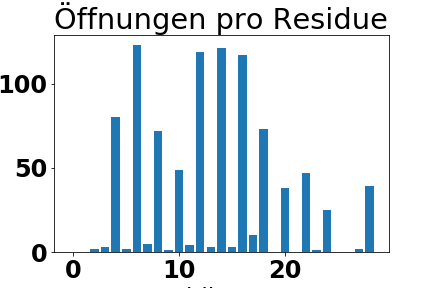

939


In [48]:
cut = 6.7
res = np.where(dist(17,"C9",17+2,"C9") > cut, 1 ,0)
resid = 3
kink_stat_sum = [0]
fig367 = plt.figure()
plt.title("Öffnungsstatistik")
plt.xlabel("Zeitschritt")
plt.ylabel("Öffnungsgrad")
plt.plot(res)
plt.show()
print(sum(res))

kink_stat = np.where(dist(3,"C9",3+2,"C9") > cut, 1 ,0)

 

while resid < 31:
    kink_stat = kink_stat +  np.where(dist(resid,"C9",resid +2,"C9") > cut, 1 ,0)
    resid += 1
    kink_stat_sum.append(sum(np.where(dist(resid,"C9",resid +2,"C9") > cut, 1 ,0)))
fig133 = plt.figure()
plt.title("Öffnungsstatistik")
plt.xlabel("Zeitschritt")
plt.ylabel("Öffnungsgrad")
plt.plot(kink_stat)
plt.show()
fig383 = plt.figure()

plt.title("Öffnungen pro Residue")
plt.xlabel("Residium No.") 
plt.ylabel("Öffnungen")
plt.bar(range(len(kink_stat_sum)),kink_stat_sum)
plt.show()
print(sum(kink_stat_sum))

In [107]:
np.where(dist(13,"C9",13+2,"C9") > 7)

(array([  582,   583,   584, ..., 11125, 12362, 12363]),)

<IPython.core.display.Javascript object>


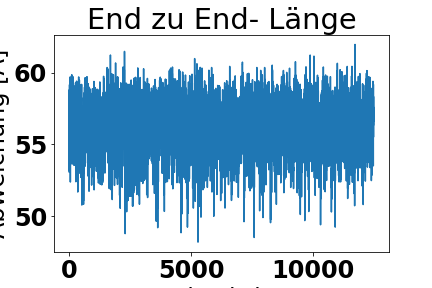

In [49]:
#contur_vec = pt.vector.vector(traj,":1&@C :34&@N" )
fig8 = plt.figure()
#plt.axis([8000,8300,0,3])
#plt.axis([2200,2240,0,10])
plt.title("End zu End- Länge")
plt.xlabel("Zeitschritt \n 1-Zeitschritt = 4 fs")
plt.ylabel("Abweichung [Å]")
contur = pt.distance(traj, ":1&@C :34&@N")

plt.plot(list(range(12500)),contur)
plt.show()

#fig8.show()

$$\alpha$$

<IPython.core.display.Javascript object>


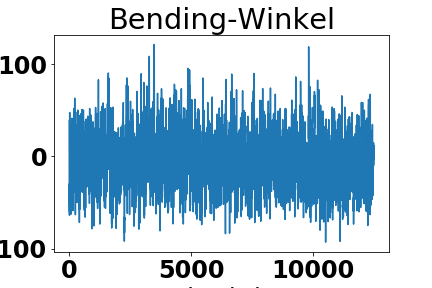

-3.735942397833996 701.4840612300455


In [50]:
dihetral = pt.dihedral(traj, ':2@C11 :2@C8 :32@C8 :32@C11')
np.shape(dihetral)
figd = plt.figure()
plt.title("Bending-Winkel")
plt.xlabel("Zeitschritt \n 1-Zeitschritt")
plt.ylabel("Winkel [°]")
plt.plot(dihetral)
print(np.average(dihetral), np.var(dihetral))
plt.show()

In [52]:
coas[:][1]
d1_2 = np.sqrt(((coas[:][0]-coas[:][1])**2).sum(axis=1))
temp = 0
dist_cont = [] 
while temp < 31:
    dist_cont.append(np.sqrt(((coas[:][temp]-coas[:][temp + 1])**2).sum(axis=1)))
    temp += 1


In [53]:
Backbone_dist = np.array(dist_cont).sum(axis= 0)

<IPython.core.display.Javascript object>


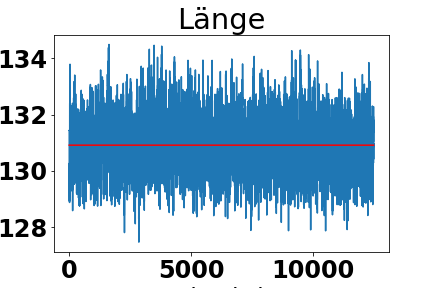

130.9123193037812   0.8392000438154277   130.87791211452233


In [54]:
fig743 = plt.figure()
plt.plot(Backbone_dist)
plt.title("Länge")
plt.xlabel("Zeitschritt")
plt.ylabel("Lange [Å]")
plt.plot([np.average(Backbone_dist)] * 12500 , c = 'r')
plt.show()
print(np.average(Backbone_dist)," ", np.var(Backbone_dist)," ", np.median(Backbone_dist))

<IPython.core.display.Javascript object>


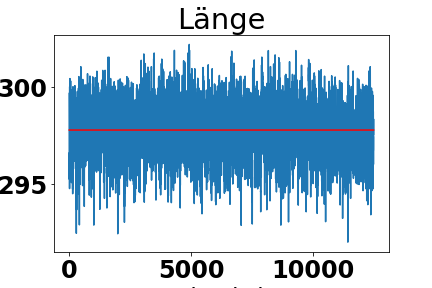

297.79387451887646   1.6300554359646164   297.8273113218917


In [58]:
coms[:][1]
d1_2 = np.sqrt(((coms[:][0]-coms[:][1])**2).sum(axis=1))
temp = 0
dist_cont_coms = [] 
while temp < 31:
    dist_cont_coms.append(np.sqrt(((coms[:][temp]-coms[:][temp + 1])**2).sum(axis=1)))
    temp += 1

Backbone_dist_coms = np.array(dist_cont_coms).sum(axis= 0)

fig743 = plt.figure()
plt.title("Länge")
plt.xlabel("Zeitschritt")
plt.ylabel("Lange [Å]")
plt.plot(Backbone_dist_coms)
plt.plot([np.average(Backbone_dist_coms)] * 12500 , c = 'r')
plt.show()
print(np.average(Backbone_dist_coms)," ", np.var(Backbone_dist_coms)," ", np.median(Backbone_dist_coms))

<IPython.core.display.Javascript object>


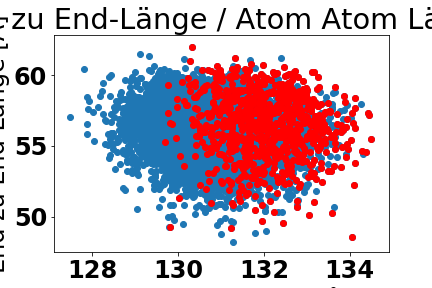

<IPython.core.display.Javascript object>


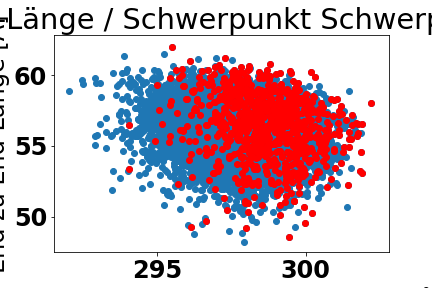

<IPython.core.display.Javascript object>


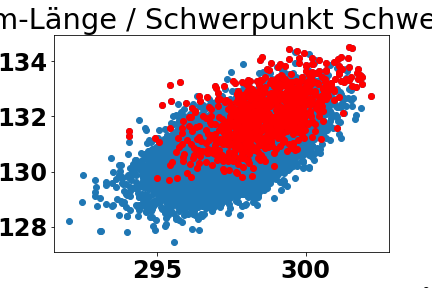

In [59]:
Kink_index = np.where(kink_stat >= 1)



fig712 = plt.figure()
plt.title("End zu End-Länge / Atom Atom Länge")
plt.xlabel("Atom Atom-Länge [Å]")
plt.ylabel("End zu End-Länge [Å]")
plt.scatter(Backbone_dist, contur)
plt.scatter(Backbone_dist[Kink_index], contur[Kink_index], c = 'r')

plt.show()


fig824 = plt.figure()

plt.title("End zu End-Länge / Schwerpunkt Schwerpunkt-Länge")
plt.xlabel("Schwerpunkt Schwerpunkt-Länge [Å]")
plt.ylabel("End zu End-Länge [Å]")
plt.scatter(Backbone_dist_coms, contur)
plt.scatter(Backbone_dist_coms[Kink_index], contur[Kink_index], c = 'r')

plt.show()


fig431 = plt.figure()
plt.title("Atom zu Atom-Länge / Schwerpunkt Schwerpunkt-Länge")
plt.xlabel("Schwerpunkt Schwerpunkt-Länge [Å]")
plt.ylabel("Atom zu Atom-Länge [Å]")
plt.scatter(Backbone_dist_coms, Backbone_dist )
plt.scatter(Backbone_dist_coms[Kink_index], Backbone_dist[Kink_index], c = 'r' ) # turn this on/off for red-color

plt.show()


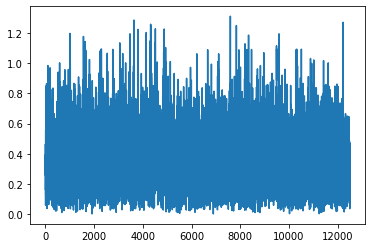

In [35]:
plt.plot(bending)

<IPython.core.display.Javascript object>


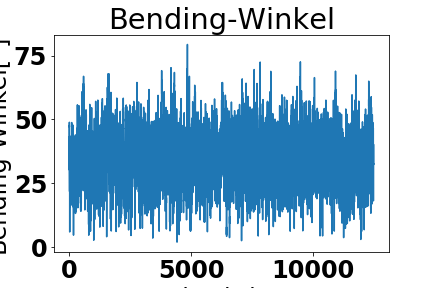

34.8223281863476   99.0871180655748   34.81128058076334


In [61]:
#angle = pt.angle(traj, ":3&@N1 :17&@N1 :31&@N1")# gibt deutlich bessere Korelation mit bending

angle = pt.angle(traj, ":3 :17 :31")
fig434 = plt.figure()
plt.title("Bending-Winkel")
plt.xlabel("Zeitschritte")
plt.ylabel("Bending-Winkel[°]")

plt.plot(180 - angle)
print(np.average(180 -angle)," ", np.var(180 -angle)," ", np.median(180 -angle))
plt.show()

<IPython.core.display.Javascript object>


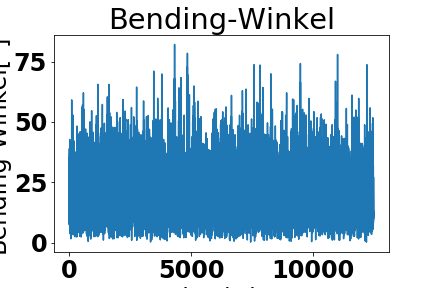

22.076905442479216   135.36577379746552   20.68393223958877


<IPython.core.display.Javascript object>


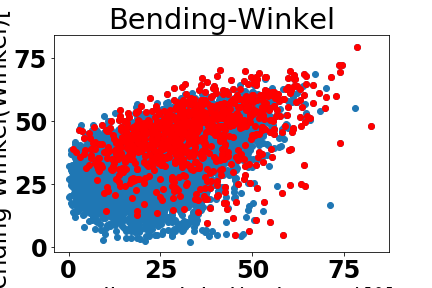

In [62]:
%matplotlib notebook

fig434 = plt.figure()
plt.title("Bending-Winkel")
plt.xlabel("Zeitschritte")
plt.ylabel("Bending-Winkel[°]")

#plt.scatter(bending,angle)
#plt.scatter(bending[Kink_index], -angle[Kink_index], c = 'r' ) # turn this on/off for red-color
plt.plot(bending* 360 / (2 *np.pi))
print(np.average(bending* 360 / (2 *np.pi))," ", np.var(bending* 360 / (2 *np.pi))," ", np.median(bending* 360 / (2 *np.pi)))

plt.show()

#180 - bending* 360 / (2 *np.pi)
fig623 = plt.figure()
plt.title("Bending-Winkel")
plt.xlabel("Bending-Winkel(Vektoren)[°]")
plt.ylabel("Bending-Winkel(Winkel)[°]")



plt.scatter(bending* 360 / (2 *np.pi),180 -angle)
#plt.scatter(180 - bending* 360 / (2 *np.pi),angle)
plt.scatter(bending[Kink_index]* 360 / (2 *np.pi), 180 -angle[Kink_index], c = 'r' ) # turn this on/off for red-color
#plt.plot(bending* 360 / (2 *np.pi))


plt.show()




<IPython.core.display.Javascript object>


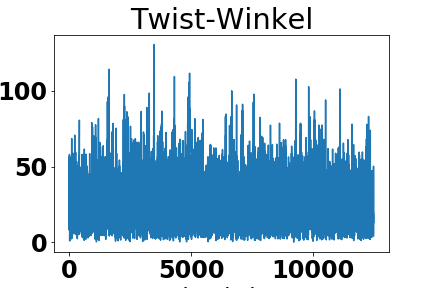

27.734789008122572   259.26324137937246   25.19149721644847


In [63]:
fig242 = plt.figure()

plt.title("Twist-Winkel")
plt.xlabel("Zeitschritte")
plt.ylabel("Twist-Winkel[°]")

plt.plot(twist* 360 / (2 *np.pi))
print(np.average(twist* 360 / (2 *np.pi))," ", np.var(twist* 360 / (2 *np.pi))," ", np.median(twist* 360 / (2 *np.pi)))

plt.show()

<IPython.core.display.Javascript object>


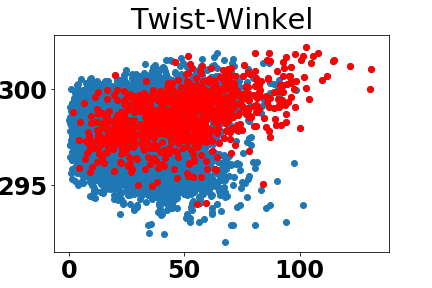

In [64]:
fig256 = plt.figure()

plt.title("Twist-Winkel")
plt.ylabel("Länge(Schwerpunkte)")
plt.xlabel("Twist-Winkel[°]")


plt.scatter(twist* 360 / (2 *np.pi), Backbone_dist_coms)
plt.scatter(twist[Kink_index]* 360 / (2 *np.pi), Backbone_dist_coms[Kink_index], c = 'r' ) # turn this on/off for red-color
plt.show()

<IPython.core.display.Javascript object>


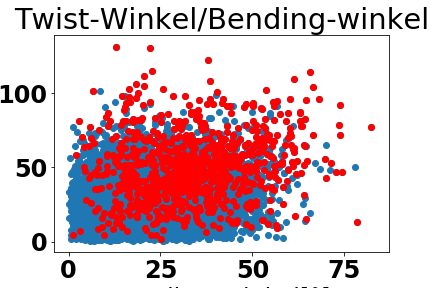

In [65]:
fig823 = plt.figure()


plt.title("Twist-Winkel/Bending-winkel")
plt.xlabel("Bending-Winkel[°]")
plt.ylabel("Twist-Winkel[°]")

plt.scatter(bending* 360 / (2 *np.pi), twist* 360 / (2 *np.pi))
plt.scatter(bending[Kink_index]* 360 / (2 *np.pi), twist[Kink_index]* 360 / (2 *np.pi), c = 'r' ) # turn this on/off for red-color
plt.show()

In [66]:
ws = np.load("watershell.npy")

In [67]:
np.shape(ws)

(2, 12500)

<IPython.core.display.Javascript object>


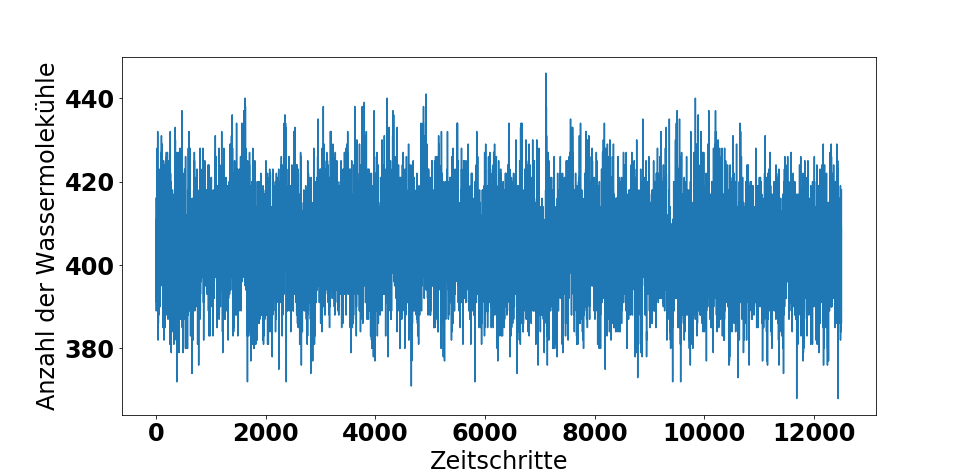

405.07568   104.50515253759998   405.0
446  ,  368


<IPython.core.display.Javascript object>


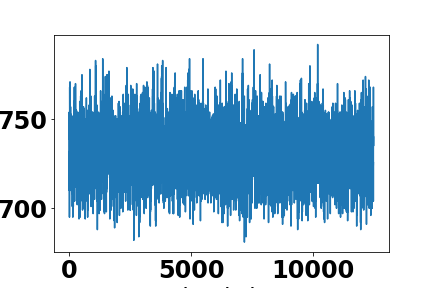

731.016   207.08726399999998   731.0
792  ,  681


In [68]:
figws = plt.figure()
plt.ylabel("Anzahl der Wassermolekühle")
plt.xlabel("Zeitschritte")
plt.plot(ws[0])
#plt.scatter(ws[0],kink_stat)
plt.show()
print(np.average(ws[0])," ", np.var(ws[0])," ", np.median(ws[0]))
print(max(ws[0]), " , " , min(ws[0]))




figws2 = plt.figure()
plt.ylabel("Anzahl der Wassermolekühle")
plt.xlabel("Zeitschritte")


plt.plot(ws[1])
#plt.scatter(ws[1],kink_stat)

plt.show()
print(np.average(ws[1])," ", np.var(ws[1])," ", np.median(ws[1]))

print(max(ws[1]), " , " , min(ws[1]))
